In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import math


%matplotlib inline

In [2]:
X = 0.3
Y = 0.2
dx = 0.00022
dy = 0.00022

In [4]:
def densitylinear(plasma_start, plasma_end, mindensity, maxdensity, dx):
    """
    
    Returns a 1-D vector with a linear plasma profile along x. The plasma density profile is 0 up until the plasma beggining,
    where it starts increasing linearly from a minimum density value to a maximum density value
    
    Parameters
    ---------
    plasma_start:float
        x coordinate of the FDTD simulation box corresponding to the beggining of the plasma
    plasma_end:float
        x coordinate of the FDTD simulation box corresponding to the end of the plasma
    dx: float
        distance occupied (in x) by each cell of the grid 
    mindensity: float
        minimum density value of the plasma
    maxdensity: float
        maximum density value of the plasma
    
    """
    
    n=int(math.ceil(plasma_end/dx))
    print(n)
    density=[]
    for i in range(0, n):
        if(i*dx>=plasma_start):
            j=i
            break
    
    density=[0]*j
    
    print(j*dx)
    #density=mx+b
    m=float((maxdensity-mindensity)/(plasma_end-plasma_start))
    b=-m*plasma_start
    
    for k in range(j, n):
        density.append(float(m*k*dx+b))
    
    return density
        

    

In [5]:
def save_output_ascii(m, filename):
    """
    Saves the 2D matrix into the output file

    Parameters
    ----------
    m : array 2d
        Matrix to be stored
    
    """
    with open(filename, 'w') as f:

        for line in m:
            l = ''
            for el in line:
                l += '%e'%el
                l += ' '
            l += '\n'
            f.write(l)
            print(l)



[[  1.30000000e+09   1.30000000e+09   1.30000000e+09]
 [  1.30000000e+09   1.30000000e+09   1.30000000e+09]
 [  1.30000000e+09   1.30000000e+09   1.30000000e+09]]
1.300000e+09 1.300000e+09 1.300000e+09 

1.300000e+09 1.300000e+09 1.300000e+09 

1.300000e+09 1.300000e+09 1.300000e+09 



In [6]:
def mapper_slabify(x, size, axis=0):
    """
    Slabifies a 1D vector into a 2D vector repeated along the y axis

    Parameters
    ----------
    x : array
        x value of the input vector to repeat
    
    size : integer
        size of output matrix along axis 0 (how many times is x repeated)
    
    Returns
    -------
    xx : 2d array
        matrix with x repeated size times (each on a different row) 
    
    """
    

    xx = np.tile(x, (size, 1))
    return xx



In [7]:
density=densitylinear(float(0.2), float(0.3), float(0), float(math.pow(10, 19)), float(dx))
print(density)

1364
0.2002
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [8]:
sizey=int(math.ceil(Y/dy))
m=mapper_slabify(density, sizey)
save_output_ascii(m, 'matrix.rfm')


0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



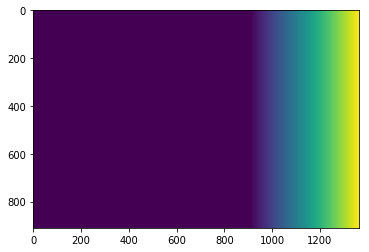

In [10]:

plt.imshow(m)

In [9]:
m.shape

(910, 1364)